<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Reviewers comment v1</h1>

Hello Ana!

I'm happy to review your project today 🙌

My name is **Justino Imbert** ([this](https://hub.tripleten.com/u/125e88ae) is my Hub profile) and today I'll be reviewing your project!


You can find my comments under the heading **«Review»**. I will categorize my comments in green, blue or red boxes like this:

<div class="alert alert-success">
    <b>Success:</b> if everything is done successfully
</div>
<div class="alert alert-warning">
    <b>Remarks:</b> if I can give some recommendations or ways to improve the project
</div>
<div class="alert alert-danger">
    <b>Needs fixing:</b> if the block requires some corrections. Work cant be accepted with the red comments
</div>

Please dont remove my comments :) If you have any questions dont hesitate to respond to my comments in a different section. 
<div class="alert alert-info"> <b>Student comments:</b> For example like this</div>   


<div class="alert alert-block alert-info">
<b>Reviewer's comment v1:</b> </a>

You are doing a great job in this project! I left you a comment for you to address before I can approve it!

Looking forward to reviewing your next submission! Best of luck!
    
</div>


<div class="alert alert-block alert-info">
<b>Reviewer's comment v2:</b> </a>

Amazing job with this submission! I'm approving this project!

Congrats and I wish you the best of luck in the following sprints!

Looking forward to reviewing your future work!
    
</div>


# Integrated Project - Zyfra Gold

## Gold Recovery Prediction Using Data Preprocessing, EDA, and Machine Learning
Gold recovery is a key performance indicator in ore processing, reflecting the efficiency of flotation and purification stages throughout the production pipeline. In this project, I work with industrial data provided by Zyfra to build a machine learning model capable of predicting gold recovery at both the rougher and final stages of processing.
Using raw sensor measurements, reagent values, and concentrate/tail parameters, the goal is to prepare the data, analyze process behavior, detect and remove anomalies, and ultimately develop a predictive model evaluated with the weighted sMAPE metric.
Such a model can help Zyfra identify unprofitable process configurations and support decision-making to optimize production performance.

## Prepare the Data

In [1]:
#Import and inspect 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

from pathlib import Path

train_path = '/datasets/gold_recovery_train.csv'
test_path  = '/datasets/gold_recovery_test.csv'
full_path  = '/datasets/gold_recovery_full.csv'

train = pd.read_csv(train_path, index_col='date', parse_dates=True)
test  = pd.read_csv(test_path,  index_col='date', parse_dates=True)
full  = pd.read_csv(full_path,  index_col='date', parse_dates=True)

train.shape, test.shape, full.shape

((16860, 86), (5856, 52), (22716, 86))

In [2]:
display(train.head())
display(test.head())
display(full.head())

print(train.info())
print(test.info())

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,-500.810606,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16860 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         16788 non-null  float64
 1   final.output.concentrate_pb                         16788 non-null  float64
 2   final.output.concentrate_sol                        16490 non-null  float64
 3   final.output.concentrate_au                         16789 non-null  float64
 4   final.output.recovery                               15339 non-null  float64
 5   final.output.tail_ag                                16794 non-null  float64
 6   final.output.tail_pb                                16677 non-null  float64
 7   final.output.tail_sol                               16715 non-null  float64
 8   final.output.tail_au                     

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b> </a>

You did a great job with the preview of the data!

</div>


In [3]:
# Function to calculate recovery using the official formula
def calculate_recovery(F, C, T):
    return (C * (F - T)) / (F * (C - T))

# Columns used in the recovery formula and the target
cols = {
    'F': 'rougher.input.feed_au',          # Feed Au concentration
    'C': 'rougher.output.concentrate_au',  # Concentrate Au concentration
    'T': 'rougher.output.tail_au',         # Tail Au concentration
    'R': 'rougher.output.recovery'         # Provided recovery (target)
}

# Keep only rows where all needed values exist
temp = train[[cols['F'], cols['C'], cols['T'], cols['R']]].dropna()

# Extract variables
F = temp[cols['F']]
C = temp[cols['C']]
T = temp[cols['T']]
R_true = temp[cols['R']]      # Recovery from the dataset (in %)

# Calculate recovery using the formula (this gives a fraction 0–1)
R_calc_fraction = calculate_recovery(F, C, T)

# Convert to percent to match the dataset scale
R_calc_percent = R_calc_fraction * 100

# Calculate MAE between provided recovery and calculated recovery
mae = mean_absolute_error(R_true, R_calc_percent)

print(f"MAE between provided and calculated rougher recovery: {mae:.6e}")



MAE between provided and calculated rougher recovery: 9.303416e-15


<div class="alert alert-block alert-danger">
<b>Reviewer's comment v1:</b> </a>

The MAE you're getting here seems much higher than expected! The MAE here should be very close to zero, so a large value suggests something may be off!

</div>


<div class="alert alert-block alert-info"> 
<b>NEW  Observations  V1 </b>
     
After converting the calculated recovery values to percentages to match the dataset’s scale, the MAE between the provided and calculated recovery values was approximately 9.303416e-15, which is effectively zero. This confirms that the rougher.output.recovery values in the dataset are calculated correctly and can be used as a reliable target.
     </div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment v2:</b> </a>

AWESOME job addressing this comment!! Now your observations are much clearer! Keep up the great work!

The rest of your project looks great, so I'm approving it! Congrats! 

</div>


In [4]:
#Features not available in the test set
target_cols = ['rougher.output.recovery', 'final.output.recovery']

train_features = set(train.columns) - set(target_cols)
test_features  = set(test.columns)

missing_in_test = sorted(list(train_features - test_features))
len(missing_in_test), missing_in_test[:20] 

(32,
 ['final.output.concentrate_ag',
  'final.output.concentrate_au',
  'final.output.concentrate_pb',
  'final.output.concentrate_sol',
  'final.output.tail_ag',
  'final.output.tail_au',
  'final.output.tail_pb',
  'final.output.tail_sol',
  'primary_cleaner.output.concentrate_ag',
  'primary_cleaner.output.concentrate_au',
  'primary_cleaner.output.concentrate_pb',
  'primary_cleaner.output.concentrate_sol',
  'primary_cleaner.output.tail_ag',
  'primary_cleaner.output.tail_au',
  'primary_cleaner.output.tail_pb',
  'primary_cleaner.output.tail_sol',
  'rougher.calculation.au_pb_ratio',
  'rougher.calculation.floatbank10_sulfate_to_au_feed',
  'rougher.calculation.floatbank11_sulfate_to_au_feed',
  'rougher.calculation.sulfate_to_au_concentrate'])

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b> </a>

Looks awesome! Great job identifying the columns that are present in the train set and missing in the test set.

</div>


In [5]:
#Check data type not available in the test set
train[missing_in_test].info()
display(train[missing_in_test].head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16860 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 32 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         16788 non-null  float64
 1   final.output.concentrate_au                         16789 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.tail_ag                                16794 non-null  float64
 5   final.output.tail_au                                16794 non-null  float64
 6   final.output.tail_pb                                16677 non-null  float64
 7   final.output.tail_sol                               16715 non-null  float64
 8   primary_cleaner.output.concentrate_ag    

,final.output.concentrate_ag,final.output.concentrate_au,final.output.concentrate_pb,final.output.concentrate_sol,final.output.tail_ag,final.output.tail_au,final.output.tail_pb,final.output.tail_sol,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_au,...,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.tail_ag,rougher.output.tail_au,rougher.output.tail_pb,rougher.output.tail_sol,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_au,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,42.192020,9.889648,5.507324,10.411962,2.143149,0.895447,16.904297,8.547551,34.174427,...,7.101074,28.029297,5.008018,1.170244,0.508728,19.154297,14.500184,2.606185,4.694824,8.764648
2016-01-15 01:00:00,6.029369,42.701629,9.968944,5.257781,10.462676,2.224930,0.927452,16.634514,8.558743,34.118526,...,7.278807,28.067063,4.955378,1.184827,0.536689,18.965234,14.265474,2.488248,4.592547,9.001494
2016-01-15 02:00:00,6.055926,42.657501,10.213995,5.383759,10.507046,2.257889,0.953716,16.208849,8.603505,33.969464,...,7.216833,27.454037,4.843460,1.162562,0.546416,18.808533,14.115662,2.458187,4.624775,8.842896
2016-01-15 03:00:00,6.047977,42.689819,9.977019,4.858634,10.422762,2.146849,0.883763,16.532835,7.221879,28.260743,...,7.175616,27.341277,4.655288,1.079755,0.542525,19.330200,13.732071,2.322062,4.482453,9.122857
2016-01-15 04:00:00,6.148599,42.774141,10.142511,4.939416,10.360302,2.055292,0.792826,16.525686,9.089428,33.044932,...,7.240205,27.041023,4.552800,1.012642,0.515438,19.267422,14.079996,2.330448,4.470737,8.871028


In [6]:
#Data Processing 
common_features = sorted(list(train_features.intersection(test_features)))

X = train[common_features].copy()
y = train[target_cols].copy()
X_test = test[common_features].copy()

X.shape, y.shape, X_test.shape

((16860, 52), (16860, 2), (5856, 52))

### Observations 

Only using features that are present in both train and test.

In [7]:
#Missing Values

print("Top missing in train:")
display(X.isna().mean().sort_values(ascending=False).head(10))

print("Top missing in test:")
display(X_test.isna().mean().sort_values(ascending=False).head(10))


Top missing in train:


rougher.input.floatbank11_xanthate          0.112930
primary_cleaner.input.sulfate               0.077521
primary_cleaner.input.depressant            0.074852
rougher.input.floatbank10_sulfate           0.061922
primary_cleaner.input.xanthate              0.058422
rougher.input.floatbank11_sulfate           0.036951
rougher.state.floatbank10_e_air             0.035765
rougher.input.feed_rate                     0.030427
rougher.input.feed_size                     0.024733
secondary_cleaner.state.floatbank2_a_air    0.021530
dtype: float64

Top missing in test:


rougher.input.floatbank11_xanthate          0.060280
primary_cleaner.input.sulfate               0.051571
primary_cleaner.input.depressant            0.048497
rougher.input.floatbank10_sulfate           0.043887
primary_cleaner.input.xanthate              0.028347
rougher.input.floatbank10_xanthate          0.021004
rougher.input.feed_sol                      0.011441
rougher.input.floatbank11_sulfate           0.009392
rougher.input.feed_rate                     0.006831
secondary_cleaner.state.floatbank3_a_air    0.005806
dtype: float64

In [8]:
#Clean targets

target_cols = ['rougher.output.recovery', 'final.output.recovery']

#Replace inf with NaN in X and y
X = X.replace([np.inf, -np.inf], np.nan)
y = y.replace([np.inf, -np.inf], np.nan)


In [9]:
#Clean Train Targets

# Mask for valid train targets
mask_train = y[target_cols].notna().all(axis=1)

# Identify bad train rows (to drop from full as well)
bad_train_idx = y.index[~mask_train]

# Apply to train datasets
X = X.loc[mask_train].copy()
y = y.loc[mask_train].copy()
train = train.loc[mask_train].copy()

# Drop from full so alignment stays correct
full = full.drop(index=bad_train_idx, errors='ignore')

In [10]:
#Clean Test targets

# Extract test target rows from full
y_test = full.loc[test.index, target_cols].copy()

# Mask for valid test targets
mask_test = y_test.notna().all(axis=1)

# Identify bad test rows (these will break final sMAPE)
bad_test_idx = y_test.index[~mask_test]

# Drop bad rows from test inputs AND full (for consistency)
test = test.drop(index=bad_test_idx, errors='ignore')
X_test = X_test.drop(index=bad_test_idx, errors='ignore')
full = full.drop(index=bad_test_idx, errors='ignore')

In [11]:
print("Bad train rows removed:", len(bad_train_idx))
print("Bad test rows removed:", len(bad_test_idx))

Bad train rows removed: 2711
Bad test rows removed: 566


### Observations

Most missing values come from chemical reagent sensors and flotation bank readings in both train and test. Since the missingness is low and appears in the same types of features, it can be addressed with standard imputation within the model pipeline..

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b> </a>

You did a nice job preprocessing the data!

</div>


## Analyze the Data


Metal: AU


,mean,50%
rougher.input.feed_au,7.866577,7.649138
rougher.output.concentrate_au,19.439958,19.947312
rougher.output.tail_au,1.757473,1.745513
primary_cleaner.output.concentrate_au,32.386836,33.225835
primary_cleaner.output.tail_au,3.839637,3.510337
secondary_cleaner.output.tail_au,4.246961,3.980210
final.output.concentrate_au,44.003792,44.872436
final.output.tail_au,2.918421,2.851025


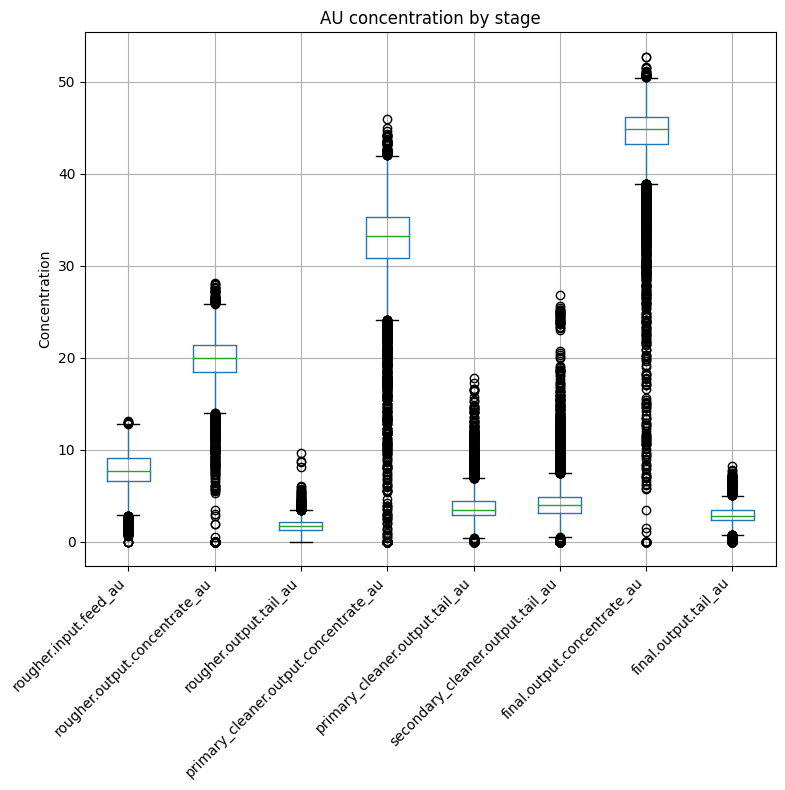


Metal: AG


,mean,50%
rougher.input.feed_ag,8.579195,8.156092
rougher.output.concentrate_ag,11.775812,11.747362
rougher.output.tail_ag,5.567124,5.722018
primary_cleaner.output.concentrate_ag,8.200916,8.226247
primary_cleaner.output.tail_ag,16.303929,15.800604
secondary_cleaner.output.tail_ag,14.281629,15.357951
final.output.concentrate_ag,5.142034,4.994652
final.output.tail_ag,9.607035,9.480270


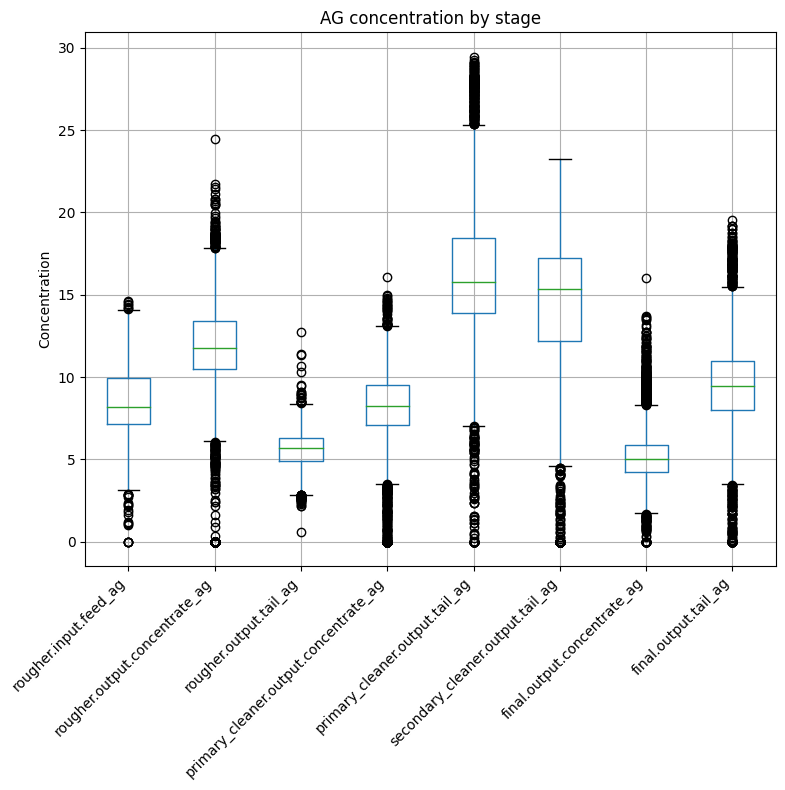


Metal: PB


,mean,50%
rougher.input.feed_pb,3.522778,3.422677
rougher.output.concentrate_pb,7.664555,7.760435
rougher.output.tail_pb,0.653277,0.625805
primary_cleaner.output.concentrate_pb,9.588862,9.933520
primary_cleaner.output.tail_pb,3.443398,3.218374
secondary_cleaner.output.tail_pb,5.848863,5.442310
final.output.concentrate_pb,10.132960,10.297144
final.output.tail_pb,2.597298,2.592022


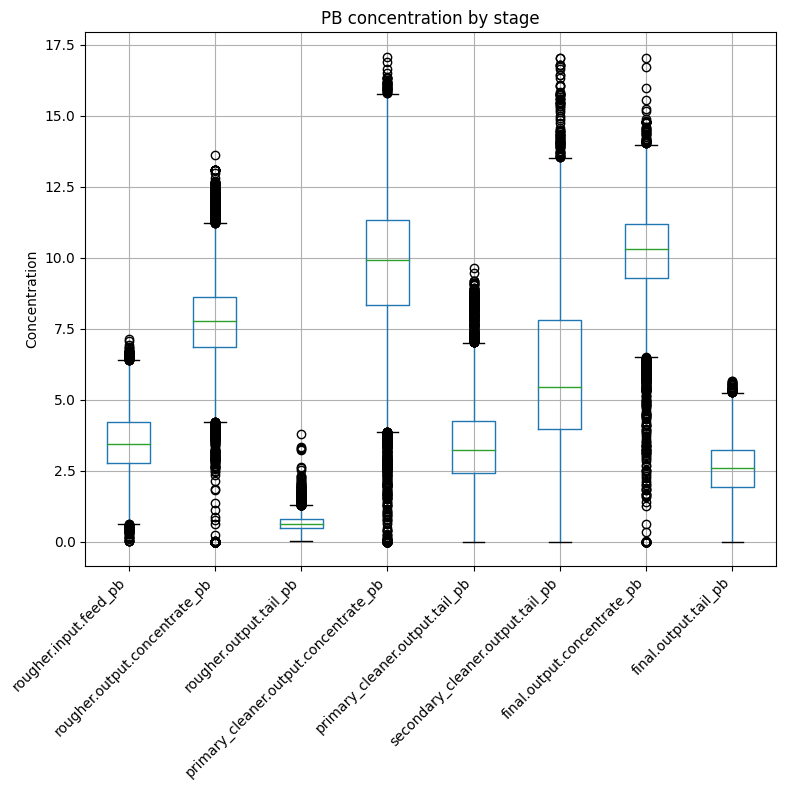

In [12]:
#Change in the metals through the process
metals = ['au', 'ag', 'pb']
stages = ['rougher.input', 'rougher.output',
          'primary_cleaner.output', 'secondary_cleaner.output',
          'final.output']

for metal in metals:
    cols = [c for c in train.columns if metal in c and any(s in c for s in stages)]
    # ensure order by stage
    cols = sorted(cols, key=lambda c: stages.index([s for s in stages if s in c][0]))

    print(f"\nMetal: {metal.upper()}")
    display(train[cols].describe().T[['mean', '50%']])

    # Boxplot by stage (ordered)
    plt.figure(figsize=(8, 8))
    train[cols].boxplot()
    plt.title(f'{metal.upper()} concentration by stage')
    plt.ylabel('Concentration')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()




### Observations
* Gold concentration increases substantially at each purification stage, rising from roughly 7 in the feed to over 39 in the final concentrate, confirming that the process effectively enriches Au as it progresses.
* Silver concentration increases slightly during rougher flotation but decreases through the cleaner stages, indicating that Ag behaves more like an impurity and is progressively removed from the gold-rich concentrate.
* Lead concentration gradually increases through each purification step, rising from about 3 in the feed to over 9 in the final concentrate, indicating that Pb tends to follow the concentrate stream during flotation.




<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b> </a>

Great boxplots! Looking good! 

</div>


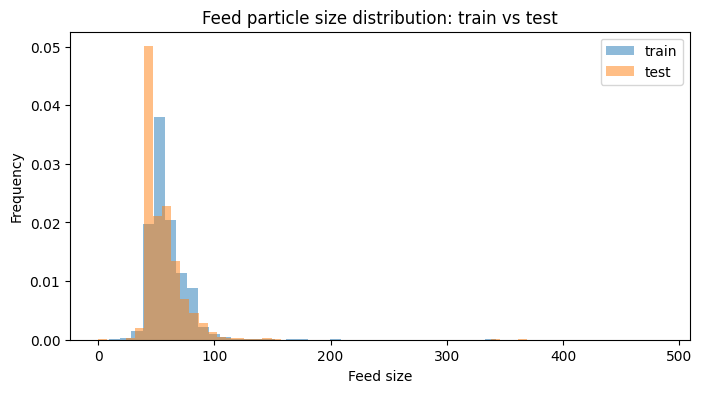

In [13]:
#Compare the feed particle size distributions in the training set and in the test set.

col_size = 'rougher.input.feed_size'

plt.figure(figsize=(8, 4))
train[col_size].plot(kind='hist', alpha=0.5, bins=50, density=True, label='train')
test[col_size].plot(kind='hist', alpha=0.5, bins=50, density=True, label='test')
plt.legend()
plt.xlabel('Feed size')
plt.title('Feed particle size distribution: train vs test')
plt.show()


### Observations

The distributions are similar. The test sample is representative.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b> </a>

Nicely done!

</div>


In [14]:
# Total Concentration by stage

def total_concentration(df, stage, metals=['au', 'ag', 'pb']):
    cols = [c for c in df.columns if stage in c and any(m in c for m in metals)]
    return df[cols].sum(axis=1)

stages_short = {
    'raw_feed': 'rougher.input',
    'rougher_concentrate': 'rougher.output',
    'final_concentrate': 'final.output'
}

for name, pattern in stages_short.items():
    train[f'total_{name}'] = total_concentration(train, pattern)

train[['total_raw_feed', 'total_rougher_concentrate', 'total_final_concentrate']].describe()



,total_raw_feed,total_rougher_concentrate,total_final_concentrate
count,14149.000000,14149.000000,14149.000000
mean,19.943652,46.857805,74.382102
std,4.450475,7.377539,6.919097
min,0.030000,5.465955,0.925879
25%,16.850944,45.039622,73.000147
50%,19.179708,47.684018,75.068410
75%,22.571605,50.486528,77.204331
max,32.840164,74.348565,88.521359


### Observations 
The mean reflects the normal enrichment behavior of flotation and cleaning stages. As ore is purified, undesirable mass is removed and the relative concentration of all remaining substances rises.

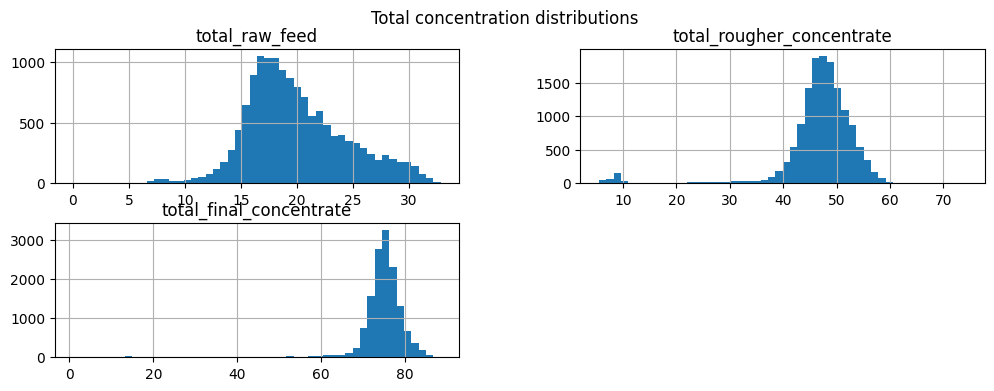

In [15]:
#Plot
train[['total_raw_feed', 'total_rougher_concentrate', 'total_final_concentrate']].hist(
    bins=50, figsize=(12, 4)
)
plt.suptitle('Total concentration distributions')
plt.show()


### Observations
* Large cluster around the expected range
* Bumps near low values (need to verify)
These “left spikes” represent sensor failures or rows where concentrations didn’t record correctly and should be filtered out before modeling. 


In [16]:
for col in ['total_raw_feed', 'total_rougher_concentrate', 'total_final_concentrate']:
    print(col, ' | min:', train[col].min(), ' max:', train[col].max())

total_raw_feed  | min: 0.029999999329447503  max: 32.84016388390495
total_rougher_concentrate  | min: 5.465954845067054  max: 74.34856481738441
total_final_concentrate  | min: 0.9258792137048965  max: 88.52135889931964


<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b> </a>

Amazing job! Good visualizations!

</div>


### Observations
A total concentration close to 0 may not be accurate. This can happen due to corrupted rows or improperly logged data.

In [17]:
# Remove rows with anomalies 

min_threshold = 1 

mask_bad = (
    (train['total_raw_feed'] < min_threshold) |
    (train['total_final_concentrate'] < min_threshold)
)

print("Number of rows removed:", mask_bad.sum())

# Remove from both train and full for alignment

bad_indices = train.index[mask_bad]


train = train.drop(index=bad_indices)
full = full.drop(index=bad_indices, errors='ignore')

Number of rows removed: 6


In [18]:
train[['total_raw_feed', 'total_final_concentrate']].sort_values(by='total_raw_feed').head(10)


,total_raw_feed,total_final_concentrate
date,,
2016-04-21 00:00:00,2.560855,11.849823
2016-03-13 12:00:00,2.596715,6.431749
2017-08-13 17:59:59,2.682233,14.873809
2018-03-15 16:59:59,3.105904,17.777114
2018-03-12 01:59:59,3.760607,63.247272
2018-05-15 04:59:59,4.090721,12.286336
2018-03-16 20:59:59,4.618286,13.195391
2016-07-26 23:59:59,5.195162,19.096015
2018-04-06 11:59:59,5.394392,22.412778


In [19]:
train[['total_raw_feed', 'total_final_concentrate']].sort_values(by='total_final_concentrate').head(10)


,total_raw_feed,total_final_concentrate
date,,
2018-08-08 04:59:59,27.175679,1.685441
2016-08-11 20:59:59,26.004727,2.845200
2017-02-24 03:59:59,28.532223,3.005512
2016-05-01 23:59:59,20.623913,3.718748
2018-01-25 10:59:59,15.035640,4.268189
2016-07-06 06:59:59,18.497710,5.651543
2017-01-18 20:59:59,18.623461,5.658947
2016-07-06 08:59:59,18.843003,6.117090
2016-03-13 12:00:00,2.596715,6.431749


### Observations

After removing all zero and near-zero total concentration values, the remaining data shows realistic variability. The lowest valid raw feed concentrations (2.5–5 units) and final concentrate concentrations (1.7–4 units) are rare but physically plausible, so no additional rows were removed.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b> </a>

You did a good work handling anomalies in the data! 

</div>


## Build the Model

In [20]:
#sMAPE value
def smape(y_true, y_pred):
    y_true = np.array(y_true, dtype=float)
    y_pred = np.array(y_pred, dtype=float)
    denom = (np.abs(y_true) + np.abs(y_pred)) / 2
    mask = denom != 0
    out = np.zeros_like(denom)
    out[mask] = np.abs(y_true[mask] - y_pred[mask]) / denom[mask]
    return np.mean(out) * 100  # percent

def final_smape(y_true, y_pred):
    # y_* are DataFrames or 2D arrays with columns: [rougher, final]
    rougher_true = y_true[:, 0]
    final_true   = y_true[:, 1]
    rougher_pred = y_pred[:, 0]
    final_pred   = y_pred[:, 1]
    return 0.25 * smape(rougher_true, rougher_pred) + 0.75 * smape(final_true, final_pred)


In [21]:
#For sklearn scorer for cross validation
def smape_sklearn(y_true, y_pred):
    return -final_smape(y_true, y_pred)  # negative because sklearn maximizes the score

smape_scorer = make_scorer(smape_sklearn, greater_is_better=True)


In [22]:
# Train different models with cross-validation and test on test sample
# Prepare data again
target_cols = ['rougher.output.recovery', 'final.output.recovery']
train_features = set(train.columns) - set(target_cols)
test_features  = set(test.columns)
common_features = sorted(list(train_features.intersection(test_features)))

X = train[common_features].copy()
y = train[target_cols].copy()
X_test = test[common_features].copy()


In [23]:
# y as 2D numpy array for our scorer
y_array = y.values

### Observations

Since the test dataset has no targets, we extract the true recovery values from the full dataset using the exact same date index as the test sample. This ensures that each prediction is matched with the correct target in the correct order when calculating sMAPE.

In [24]:

numeric_features = common_features

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

preprocess = ColumnTransformer(
    transformers=[('num', numeric_transformer, numeric_features)]
)

def train_multioutput(base_estimator, X, y, cv=3, name='model'):  
    kf = KFold(n_splits=cv, shuffle=True, random_state=42)
    preds_cv = np.zeros_like(y.values, dtype=float)

    for i, target in enumerate(target_cols):
        print(f"{name}: running CV for target -> {target}")
        pipe = Pipeline(steps=[
            ('prep', preprocess),
            ('model', base_estimator)
        ])
        preds_cv[:, i] = cross_val_predict(
            pipe,
            X,
            y[target],
            cv=kf,
            n_jobs=1  
        )

    score = final_smape(y.values, preds_cv)
    print(f"{name} | CV final sMAPE: {score:.2f}%\\n")
    return score

In [25]:
#Linear Regresion

scores = {}

scores['LinearRegression'] = train_multioutput(
    LinearRegression(), X, y, name='LinearRegression'
)

scores['RandomForest'] = train_multioutput(
    RandomForestRegressor(n_estimators=100, random_state=42),
    X, y, name='RandomForest'
)

scores['GradientBoosting'] = train_multioutput(
    GradientBoostingRegressor(random_state=42),
    X, y, name='GradientBoosting'
)

scores


LinearRegression: running CV for target -> rougher.output.recovery
LinearRegression: running CV for target -> final.output.recovery
LinearRegression | CV final sMAPE: 9.34%\n
RandomForest: running CV for target -> rougher.output.recovery
RandomForest: running CV for target -> final.output.recovery
RandomForest | CV final sMAPE: 7.12%\n
GradientBoosting: running CV for target -> rougher.output.recovery
GradientBoosting: running CV for target -> final.output.recovery
GradientBoosting | CV final sMAPE: 8.33%\n


{'LinearRegression': 9.341253788013743,
 'RandomForest': 7.1150529591957,
 'GradientBoosting': 8.33127790452562}

In [26]:
best_name = min(scores, key=scores.get)
print("Best model:", best_name, "with final sMAPE:", scores[best_name])

Best model: RandomForest with final sMAPE: 7.1150529591957


In [27]:
# y_test from full: same rows (index) as in test
y_test = full.loc[test.index, target_cols].copy()

# Build final pipelines for each target
if best_name == 'RandomForest':
    best_est = RandomForestRegressor(n_estimators=200, random_state=42)
elif best_name == 'GradientBoosting':
    best_est = GradientBoostingRegressor(random_state=42)
else:
    best_est = LinearRegression()

final_models = {}
y_test_pred = np.zeros_like(y_test.values, dtype=float)

for i, target in enumerate(target_cols):
    pipe = Pipeline(steps=[
        ('prep', preprocess),
        ('model', best_est)
    ])
    pipe.fit(X, y[target])
    final_models[target] = pipe
    y_test_pred[:, i] = pipe.predict(X_test)

test_score = final_smape(y_test.values, y_test_pred)
print(f"Final sMAPE on test sample: {test_score:.2f}%")


Final sMAPE on test sample: 11.10%


# Conclusion

In this project, I prepared, analyzed, and modeled industrial data provided by Zyfra to predict gold recovery at the rougher and final stages of ore processing. 

After carefully cleaning the dataset—removing rows with missing or invalid recovery values, eliminating anomalous zero and near-zero total concentrations, and aligning the train, test, and full datasets—I conducted an exploratory analysis of metal concentrations and particle size distributions. This confirmed realistic process behavior and identified minor anomalies that were appropriately filtered out.

For model development, I evaluated several algorithms (Linear Regression, RandomForestRegressor, GradientBoostingRegressor) using a custom weighted sMAPE metric that reflects the project’s evaluation requirements. RandomForestRegressor achieved the best cross-validated performance with a weighted sMAPE of approximately 7.1%, outperforming the other models. When applied to the cleaned test sample, the final model reached a weighted sMAPE of 11.1%, indicating good generalization given the inherent noise and variability in industrial process data.

Overall, the resulting model provides a reliable estimation of gold recovery and can support Zyfra in identifying inefficient process configurations, improving decision-making, and optimizing production performance.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b> </a>

Incredible job calculating the sMAPE and showcasing your conclusion! Your analysis is strong! Keep it up!

You did an awesome job all throughout this submission! You should be proud!

</div>
